In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
data

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1097,24,71.000,1,0,0,100,0,1,...,1,1,2,0,364,475,734,1,770,802
528,1,154,21,52.300,1,0,0,90,0,1,...,1,1,2,0,415,181,84,1,949,666
529,1,588,16,63.000,1,0,0,100,0,1,...,1,1,3,0,299,214,124,1,546,471
530,0,395,17,102.967,1,0,0,100,0,1,...,1,1,3,0,373,218,-1,0,1759,1030


[Data DESCR]

Brief Description

The original paper describing the trial is Hammer, S. M., Katzenstein, D. A., Hughes, M. D., Gundaker, H., Schooley, R. T., Haubrich, R. H., Henry, W. K., Lederman, M. M., Phair, J. P., Niu, M., Hirsch, M. S., and Merigan, T. C., for the Aids Clinical Trials Group Study 175 Study Team (1996). A trial comparing nucleoside monotherapy with combination therapy in HIV-infected adults with CD4 counts from 200 to 500 per cubic millimeter. The New England Journal of Medicine, 1081-1089.

Linear regression of response = cd4 count at 20 +- 5 weeks (cd420) was used in Tsiatis, A.A., Davidian, M., Zhang, M., and Lu, X. (2008), "Covariate adjustment for two-sample treatment comparisons in randomized clinical trials: A principled yet flexible approach," Statistics in Medicine.

Cox regression of response = time to death (event) was used in Lu X, Tsiatis AA (2008), "Improving the efficiency of the logrank test using auxiliary covariates," Biometrika.

In the text file above, the variables are named

- censor     :     censoring indicator = 1 if dead = 0 if censored
- event      :     event time
- age        :     age (yrs) at baseline
- wtkg       :     weight (kg) at baseline
- hemo       :     hemophilia (0=no, 1=yes)
- homo       :     homosexual activity (0=no, 1=yes)
- drugs      :     history of IV drug use (0=no, 1=yes)
- karnof     :     Karnofsky score (on a scale of 0-100)
- oprior     :     Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)
- z30        :     ZDV in the 30 days prior to 175 (0=no, 1=yes)
- zprior     :     ZDV prior to 175 (0=no, 1=yes)
- preanti    :     # days pre-175 anti-retroviral therapy
- race       :     race (0=White, 1=non-white)
- gender     :     gender (0=F, 1=M)
- str2       :     antiretroviral history (0=naive, 1=experienced)
- strat      :     antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)
- symptom    :     symptomatic indicator (0=asymp, 1=symp)
- cd40       :     baseline cd4
- cd420      :     cd4 count at 20 +- 5 weeks
- cd496      :     cd4 count at 96 +- 5 weeks (missing for a lot of subjects)
- r          :     missingness indicator for cd496
- cd80       :     baseline cd8 count
- cd820      :     cd8 count at 20 +- 5 weeks

In [4]:
data.shape

(532, 23)

In [5]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


[ISSUE]
 - Tree 계열은 Scaling이 필요한가?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   censor   532 non-null    int64  
 1   event    532 non-null    int64  
 2   age      532 non-null    int64  
 3   wtkg     532 non-null    float64
 4   hemo     532 non-null    int64  
 5   homo     532 non-null    int64  
 6   drugs    532 non-null    int64  
 7   karnof   532 non-null    int64  
 8   oprior   532 non-null    int64  
 9   z30      532 non-null    int64  
 10  zprior   532 non-null    int64  
 11  preanti  532 non-null    int64  
 12  race     532 non-null    int64  
 13  gender   532 non-null    int64  
 14  str2     532 non-null    int64  
 15  strat    532 non-null    int64  
 16  symptom  532 non-null    int64  
 17  cd40     532 non-null    int64  
 18  cd420    532 non-null    int64  
 19  cd496    532 non-null    int64  
 20  r        532 non-null    int64  
 21  cd80     532 non

In [7]:
# Label Balace Check - Imbalance ---> 결과를 보고 정확도를 적용할지, F1 Score를 적용할지 판단해야함.
Counter(data['censor'])

Counter({0: 351, 1: 181})

In [8]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

In [9]:
data.shape

(532, 23)

In [10]:
X.shape

(532, 22)

In [11]:
Y.shape

(532,)

In [12]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))
print(">>>> # of Train data Y : {}".format(Counter(Y.iloc[train_idx])))
print(">>>> # of valid data Y : {}".format(Counter(Y.iloc[valid_idx])))

>>>> # of Train data : 372
>>>> # of valid data : 160
>>>> # of Train data Y : Counter({0: 250, 1: 122})
>>>> # of valid data Y : Counter({0: 101, 1: 59})


[Decision Tree를 활용한 Rule Extraction]

 - Max_Depth는 5 초과를 넘지 않아야함, 5를 초과하게 되면 Rule Extraction Plotting의 가독성이 매우 떨어짐
 - 정확도와 설명력은 Trade-off가 존재하기 때문에 자기만의 기준으로 적절한 선을 선택하면 됨
 - Rule Extraction 할때 GINI INDEX 뿐만 아니라 Sample 개수도 중요한 척도가 됨
GINI INDEX가 아주 낮지만(불순도가 낮음, 좋음) Sample의 개수가 너무 적으면 의미가 없음(Overfitting이라고 생각됨)

In [13]:
## Depth를 다르게 설정해보면서 학습.
for i in range(2,11,1):
    print(">>>> Depth {}".format(i))

    model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model.fit(X.iloc[train_idx], Y.iloc[train_idx])

    # Train Acc
    y_pre_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
    print("Train Confusion Matrix")
    print(cm_train)
    print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
    print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

    # Test Acc
    y_pre_test = model.predict(X.iloc[valid_idx])
    cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
    print("Train Confusion Matrix")
    print(cm_test)
    print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
    print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
    print("-----------------------------------------------------------------------")
    print("-----------------------------------------------------------------------")

>>>> Depth 2
Train Confusion Matrix
[[241   9]
 [ 44  78]]
Train Acc : 0.8575268817204301
Train F1-Score : 0.7464114832535885
Train Confusion Matrix
[[97  4]
 [26 33]]
TesT Acc : 0.8125
Test F1-Score : 0.6874999999999999
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 3
Train Confusion Matrix
[[228  22]
 [ 18 104]]
Train Acc : 0.8924731182795699
Train F1-Score : 0.8387096774193549
Train Confusion Matrix
[[87 14]
 [13 46]]
TesT Acc : 0.83125
Test F1-Score : 0.773109243697479
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 4
Train Confusion Matrix
[[227  23]
 [ 10 112]]
Train Acc : 0.9112903225806451
Train F1-Score : 0.8715953307392996
Train Confusion Matrix
[[90 11]
 [11 48]]
TesT Acc : 0.8625
Test F1-Score : 0.8135593220338985
-------------------------------------------------

In [14]:
# Depth가 깊어질 수록 정확도는 높게 나오지만 해석력에 대한 가독성을 위해 Depth 4를 선택함
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X.iloc[train_idx], Y.iloc[train_idx])

DecisionTreeClassifier(max_depth=4)

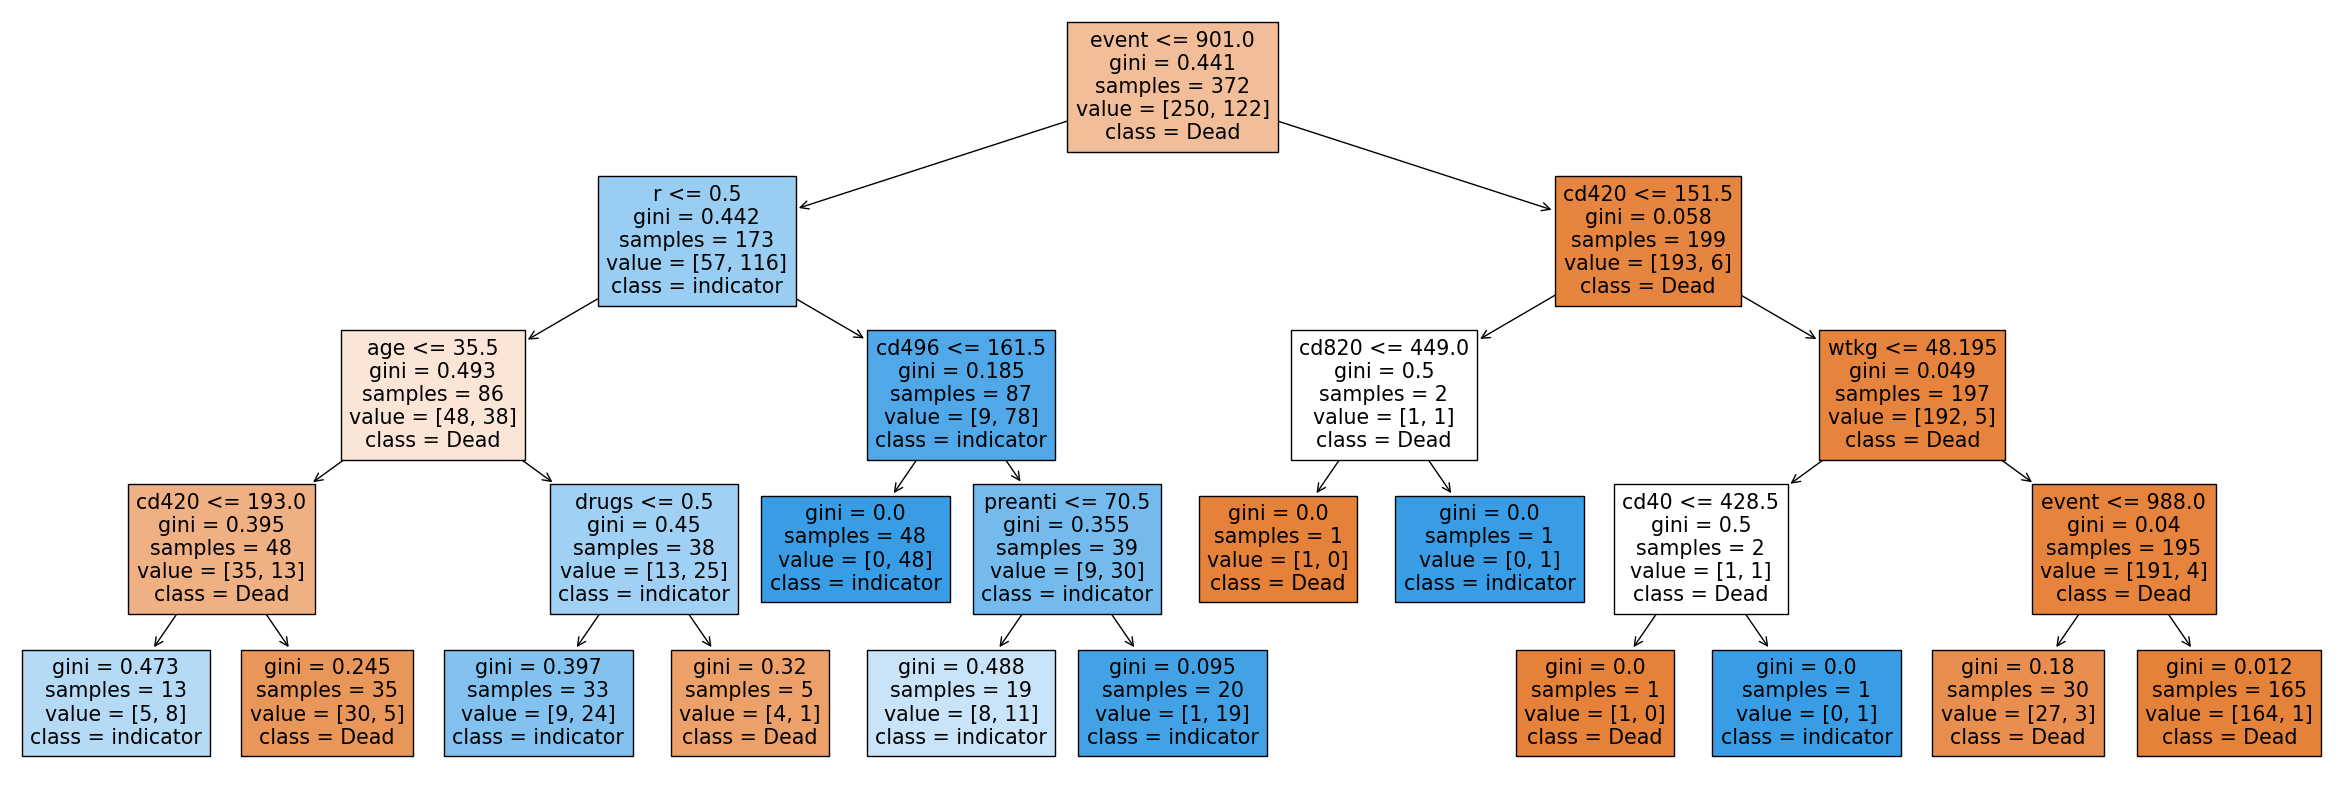

In [16]:
# Creating the tree plot
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names = ['Dead', 'indicator'])
plt.rcParams['figure.figsize'] = [50,10]

[Random Forest]

 - Hyperparameter tuning
 - estimators, depth
 - Random Forest는 이 두개만 조절해도 좋은 결과를 얻을 수 있음
 - GridSearchCV를 사용하지 않고 For Loop를 돌리는 이유
    - 내가 원하는 결과를 저장하고 Display 하고 싶음
    - 내가 원하는 결과를 실시간 Display 하면서 그때 그때 파라미터 튜닝에 대한 대처를 하고 싶음

[Random Forest Parameters]
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - n_estimators : # of Tree
  - criterion : Measuring for Split (Information gain)
     - Gini
     - entropy
     - log_loss
  - max_depth : Tree의 최대 깊이 제한
  - min_samples_split : 2개로 Split 하는게 아니라 N개로 Split 가능
  - bootstrap : Bagging 중 Boostrap 기법
  - max_features : Feature 수 sampling
     - auto
     - sqrt
     - log2
  - oob_score : out-of-bag Score
  - class_weight : Label Imbalance 데이터 학습시 weight를 주는 것
     - {0: 1, 1: 1}
  - random_state : Two way Random Choosen 때문에 매 결과가 달라짐
     - 지정한 값으로 해주는 것이 결과가 같아짐

In [17]:
# RandomForest Hyperparameter
estimators = [10, 30, 40, 50, 60] ## 몇 개의 트리를 포함할 것인가??
depth = [4, 5, 10, 15] ## 4번의 랜덤 포레스트 실험에서 각각에 적용될 최대깊이

# Modeling
save_est = []
save_dep = []
f1_score_ = []

cnt = 0
for est in estimators:
    for dep in depth:
        print(">>> {} <<<".format(cnt))
        cnt += 1
        print("Number of Estimators : {}, Max Depth : {}".format(est, dep))
        
        model = RandomForestClassifier(n_estimators=est, 
                                       max_depth=dep, 
                                       random_state=119,
                                       criterion='gini', 
                                       max_features='auto', 
                                       bootstrap=True, ## 반드시 True로 설정.
                                       oob_score=False) ## if you use "oob_score=True", get long time for training
        
        model.fit(X.iloc[train_idx], Y.iloc[train_idx])

        # Train Acc
        y_pre_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
        print("Train Confusion Matrix")
        print(cm_train)
        print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
        print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

        # Test Acc
        y_pre_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
        print("Test Confusion Matrix")
        print(cm_test)
        print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
        print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
        print("-----------------------------------------------------------------------")
        print("-----------------------------------------------------------------------")
        save_est.append(est)
        save_dep.append(dep)
        f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 10, Max Depth : 4
Train Confusion Matrix
[[242   8]
 [ 29  93]]
Train Acc : 0.9005376344086021
Train F1-Score : 0.8340807174887892
Test Confusion Matrix
[[93  8]
 [26 33]]
TesT Acc : 0.7875
Test F1-Score : 0.6599999999999999
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 10, Max Depth : 5
Train Confusion Matrix
[[243   7]
 [ 14 108]]
Train Acc : 0.9435483870967742
Train F1-Score : 0.9113924050632911
Test Confusion Matrix
[[90 11]
 [23 36]]
TesT Acc : 0.7875
Test F1-Score : 0.679245283018868
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 10, Max Depth : 10
Train Confusion Matrix
[[249   1]
 [  3 119]]
Train Acc : 0.989247311827957
Train F1-Score : 0.9834710743801653
Test Confusion Matrix
[[93  8]
 [

In [19]:
# Best Model
best_model = RandomForestClassifier(n_estimators=save_est[np.argmax(f1_score_)], 
                                    max_depth=save_dep[np.argmax(f1_score_)], 
                                    random_state=119,
                                    criterion='gini', 
                                    max_features='auto', 
                                    bootstrap=True, 
                                    oob_score=False)

best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=119)

In [20]:
# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum())) 
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[250   0]
 [  0 122]]
Train Acc : 1.0
Train F1-Score : 1.0
Test Confusion Matrix
[[93  8]
 [12 47]]
TesT Acc : 0.875
Test F1-Score : 0.8245614035087718


In [21]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.325071    event
1   0.116611    cd420
2   0.080297    cd496
3   0.068333     cd80
4   0.066404     wtkg
5   0.064655    cd820
6   0.062691     cd40
7   0.054047      age
8   0.047875  preanti
9   0.036185        r
10  0.013194   karnof
11  0.011671    strat
12  0.011409     race
13  0.006760    drugs
14  0.006678   gender
15  0.006291     hemo
16  0.006121     homo
17  0.005438  symptom
18  0.005390      z30
19  0.004878     str2
20  0.000000   zprior
21  0.000000   oprior


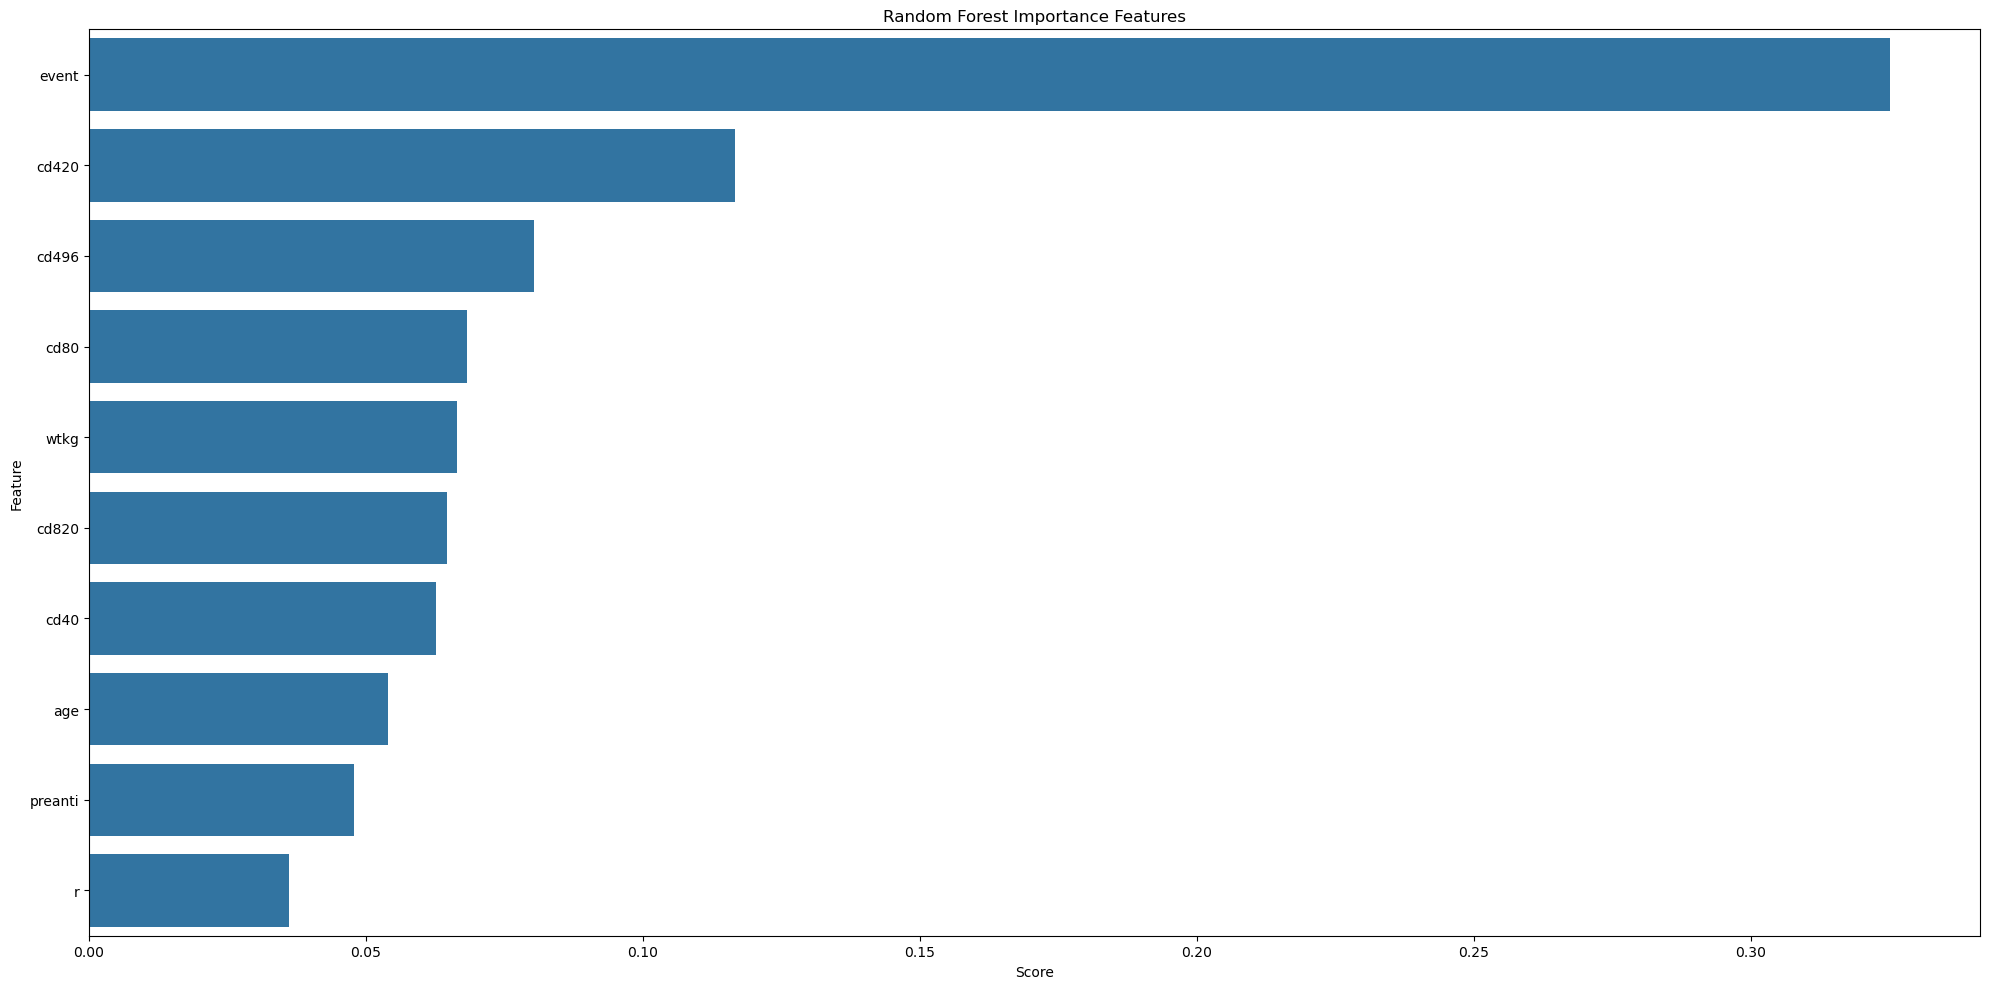

In [22]:
# Importance Score Top 10
feature_map_20 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('Random Forest Importance Features')
plt.tight_layout()
plt.show()